In [1]:
%matplotlib notebook

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

QUESTIONS

1. Popular varietals:
a) what regions produce highest quantity cabernet, merlot, blended varietals?
b) Of all the wines in the dataset, what is the most common/least common varietal in the top ten/or top 10% rated wines?
c) the least common varietal in the top 10/10% - does that make it more valuable because it is less common AND made it to the top?
2. BLENDS:
a) blends are said to be more complex and enhanced flavors - are blends frequently in the top rated wines? 
b) Is it more expensive to make blends because you have to experiment with combinations? 
c) does that make the wine itself more expensive? 
d. What regions produce the highest quantity of blends OR highest rated blends?

POSSIBLE DATA SET ISSUES

1. Who is using this ratings app?
a) For example, if it is not heavily used in one particular country, say France, are we getting an accurate picture of preference? Would a French person rate an wine from the United States lower because of bias?

In [3]:
wine_df = pd.read_csv('Wine_data.csv', encoding="ISO-8859-1")

# wine_df.head(20)



In [4]:
#Data Cleanup
wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})
cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]
# cleaned_df

# mindies code
# cab = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Cabernet Sauvignon",regex=False)]
# cab



In [9]:
# Store Variables

# All varietals split from their commas in the cell
varietals_split = cleaned_df['Varietal'].astype(str).str.split(',\s+', expand=True).stack().value_counts()
varietals_split.head(50)

# varietals_split = varietals_split.reset_index(drop=False)
# varietals_split = varietals_split.rename(columns={"index":"Varietal","0":"Value Counts"})
# #varietals_split
# cab_split = cab[['Varietal']]
# merge = cab_split.merge(varietals_split, how="left", on="Varietal")
# merge
# merge_diff = cab_split.compare(varietals_split)

# # # Count of varietals by country
varietals_count = cleaned_df.groupby('Country').count()['Varietal']
# print(varietals_count)

# Count of wineries by country
winery_count = cleaned_df.groupby('Country').count()['Winery']

# Average rating of wines in each country
wine_rating = cleaned_df.groupby('Country').mean()['Rating']



In [10]:
# df options

# Count of wineries by country
winery_count_df = pd.DataFrame({'Winery Count': winery_count})

# Average rating of wines in each country
wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})

# Count of varietals by country
varietals_count_df = pd.DataFrame({'Varietals Count':varietals_count})
varietals_count_df

# Top Varietals (Varietals that appear most frequently in our dataset)
varietals_split_df = pd.DataFrame({'Top Varietals': varietals_split })
varietals_split_df

,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
...,...
Cabernet Merlot,1
Agiorgitkio,1
Alicante B,1
Cinsaut,1


In [11]:
# Top 10 Options

# Variale for top 10 wine producing countries
top10_country = winery_count_df.nlargest(10, 'Winery Count') 

# Variable for top 10 rating on wines
top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')

# Variable for count of varietals in our top 10 countries 
top10_varietals_df = varietals_count_df.nlargest(10, 'Varietals Count')
top10_varietals_df

# Variable for split varietals (most frequently listed in our dataset)
top10_varietals_split_df = varietals_split_df.nlargest(10, 'Top Varietals')
top10_varietals_split_df


# # variable for top varietals list
# temp_df = top10_varietals_split_df.reset_index()
# topvarlist= ["Cabernet Sauvignon","Pinot Noir","Merlot", "Chardonnay", "Syrah",  
#              "Sauvignon Blanc","Cabernet Franc", "Pinot Gris", "Riesling" ,"Malbec" ]
# print(topvarlist)





,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
Sauvignon Blanc,640
Cabernet Franc,627
Pinot Gris,566
Riesling,537
Malbec,507


In [12]:
# Merge Top Wine Producing Countries with Average Ratings for those Countries
merge_df = top10_country.merge(wine_rating_df, on = 'Country')

# Merge Varietals Count/Wine Rating/Winery Cout on Country
merge_varietals_df = merge_df.merge(varietals_count_df, on = 'Country')
merge_varietals_df

# # Merge Top Popular Wine Varietals with Average Rating for those Countries
# merge_var_rat_df = top10_varietals_split.merge(top10_country)
# merge_var_rat_df

,Winery Count,Wine Rating,Varietals Count
Country,,,
USA,4211,77.101990,4155
Canada,2555,76.416850,2522
France,1716,76.952722,1675
Italy,1605,76.844544,1589
Spain,588,76.671740,580
Australia,460,76.146005,459
Argentina,421,75.767816,420
Chile,311,75.813061,311
New Zealand,241,76.859121,238


In [14]:
# Plot for Average Wine Rating in Top Ten Countries
# top_rat_plot = merge_varietals_df.plot.bar(rot=45, facecolor="teal", align="center")
# plt.xlabel('Countries', fontsize=10)
# plt.ylabel('Rating', fontsize=10)
# plt.tight_layout()
# plt.savefig("top_rat_plot.png")


# /////////////DONT NEED///////////////

In [17]:
# Plot for Count of Varietals / Blends in the Top Ten Wine Producing Countries
# var_plot = top10_varietals_df.plot.bar(rot=45, facecolor="teal", align="center")
# plt.xlabel('Countries', fontsize=10)
# plt.ylabel('Varietals Count', fontsize=10)
# plt.tight_layout()
# plt.savefig("var_plot")
# /////////////DONT NEED///////////////


<IPython.core.display.Javascript object>


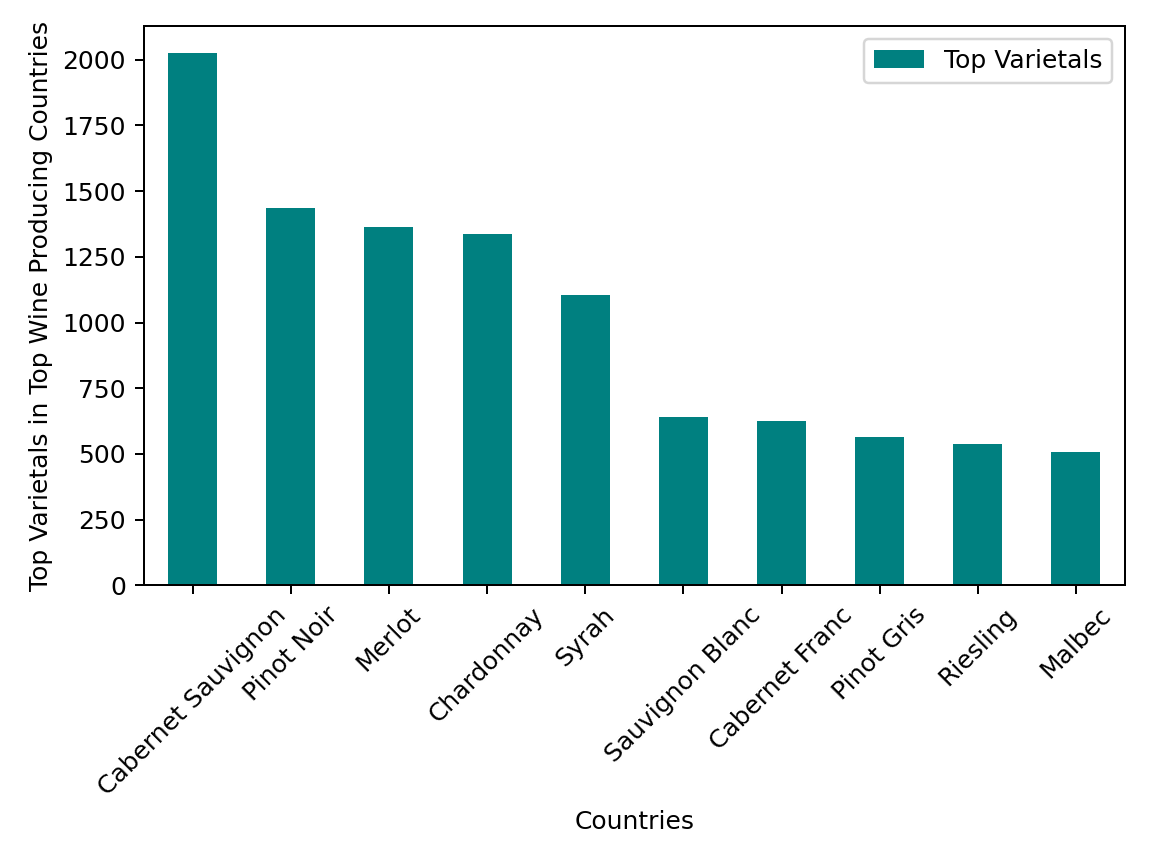

In [18]:

# Plot for Top Ten Varietal Types in the Top Ten Wine Producing Countries
top10_var_plot = top10_varietals_split_df.plot.bar(rot=45, facecolor="teal", align="center")
plt.xlabel('Countries', fontsize=10)
plt.ylabel('Top Varietals in Top Wine Producing Countries', fontsize=10)
plt.tight_layout()
plt.savefig("top10_var_plot")







In [ ]:
# Now make a plot that takes thes top10_var_plot varietals and shows the average rating of that type of varietal. 
# using the cleaned_df you will want to use the calculations below to clean it up further. Mindie said to open cleaned_df
# in excel and clean it up in excel where it will be much easier to clean then pull it back into here and do the calculations below
# using the cab calculation:
# cab = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Cabernet Sauvignon",regex=False)]
# make one for each:
# char = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Chardonnay",regex=False)]
# mer = cleaned_df[cleaned_df["Varietal"].astype(str).str.contains("Merlot",regex=False)]
# etc..... through the top varietals above.

In [20]:
# First, Locate pure varietal using loc and count
# Next, create dataframe of top ten highest amount of occurance of pure varietal, mean rating for that type of varietal
# Finally, create bar plot

# Top Varietals Count and Mean Rating
cab_sauv = "Cabernet Sauvignon"
cab_sauv_cnt = cleaned_df.loc[(cleaned_df["Varietal"] == "Cabernet Sauvignon"), "Varietal"].count()
cab_sauv_rat = cleaned_df.loc[(cleaned_df["Varietal"] == "Cabernet Sauvignon"),"Rating"].mean()


pin_noir = "Pinot Noir"
pin_noir_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Pinot Noir"), "Varietal"].count()
pin_noir_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Pinot Noir"),"Rating"].mean()

merlot="Merlot"
merlot_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Merlot"), "Varietal"].count()
merlot_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Merlot"),"Rating"].mean()

char="Chardonnay"
char_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Chardonnay"), "Varietal"].count()
char_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Chardonnay"),"Rating"].mean()

syrah="Syrah"
syrah_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Syrah"), "Varietal"].count()
syrah_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Syrah"),"Rating"].mean()

sauv_blanc="Sauvignon Blanc"
sauv_blanc_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Sauvignon Blanc"), "Varietal"].count()
sauv_blanc_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Sauvignon Blanc"),"Rating"].mean()

cab_fra="Cabernet Franc"
cab_fra_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Cabernet Franc"), "Varietal"].count()
cab_fra_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Cabernet Franc"),"Rating"].mean()

pin_gris="Pinot Grisio"
pin_gris_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Pinot Gris"), "Varietal"].count()
pin_gris_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Pinot Gris"),"Rating"].mean()

ries="Riesling"
ries_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Riesling"), "Varietal"].count()
ries_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Riesling"),"Rating"].mean()

mal="Malbec"
mal_cnt=cleaned_df.loc[(cleaned_df["Varietal"] == "Malbec"), "Varietal"].count()
mal_rat=cleaned_df.loc[(cleaned_df["Varietal"] == "Malbec"),"Rating"].mean()



In [35]:
varietal_dicts = {
        "Varietal" : [cab_sauv, pin_noir, merlot, char, syrah, sauv_blanc, cab_fra, pin_gris, ries, mal],
        "Average Varietal Rating" : [cab_sauv_rat, pin_noir_rat, merlot_rat, char_rat, syrah_rat, sauv_blanc_rat, cab_fra_rat, pin_gris_rat, ries_rat, mal_rat]
                  }
        
var_rat_df = pd.DataFrame(varietal_dicts)
var_rat_df.set_index("Varietal", inplace=True)
var_rat_df




,Average Varietal Rating
Varietal,
Cabernet Sauvignon,77.300671
Pinot Noir,77.143717
Merlot,76.404243
Chardonnay,76.788476
Syrah,76.607628
Sauvignon Blanc,76.603257
Cabernet Franc,76.729354
Pinot Grisio,75.845374
Riesling,76.644404


<IPython.core.display.Javascript object>


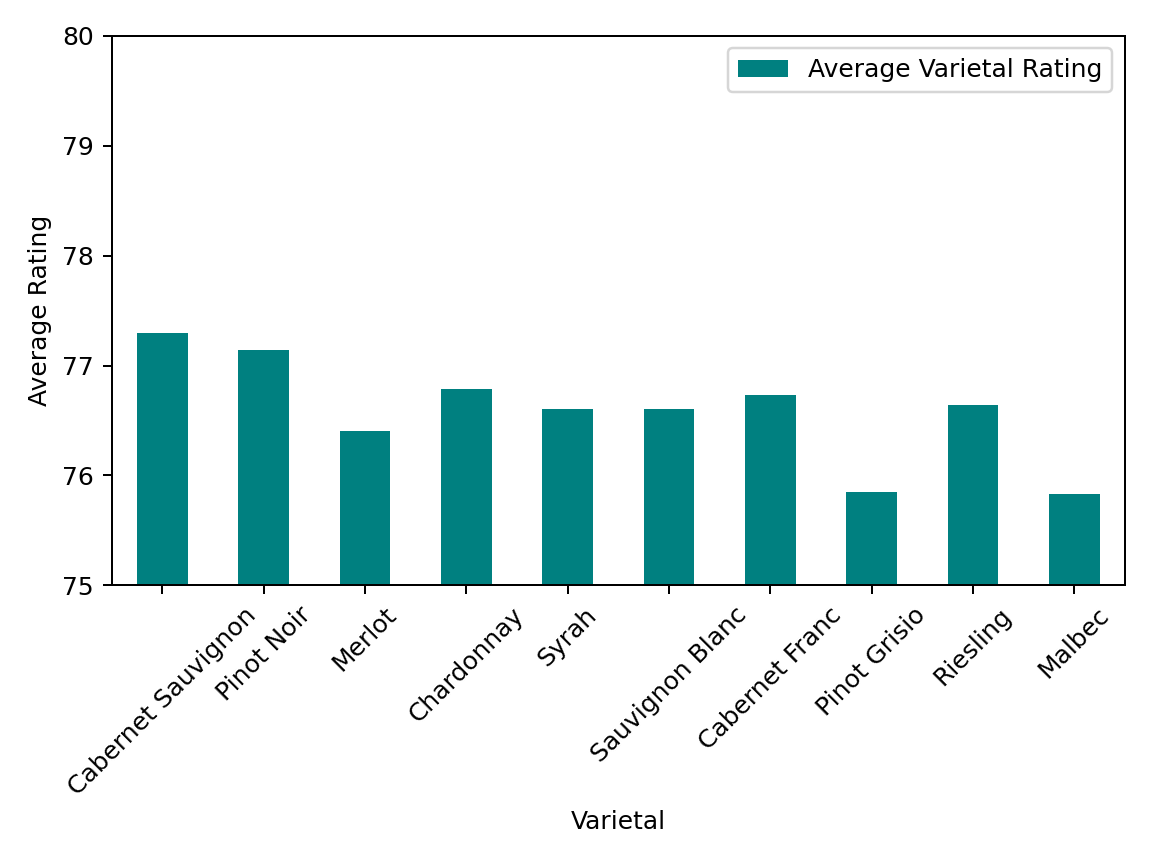

In [44]:
# Plot for Top Ten Varietal Types and Ratings
var_rat_df_plot = var_rat_df.plot.bar(rot=45, facecolor="teal", align="center",ylim=(75,80))
plt.xlabel('Varietal', fontsize=10)
plt.ylabel('Average Rating', fontsize=10)
plt.tight_layout()
plt.savefig("top10_var_plot")

In [45]:
varietal_dicts = {
        "Varietal" : [cab_sauv, pin_noir, merlot, char, syrah, sauv_blanc, cab_fra, pin_gris, ries, mal],
        "Varietal Count" : [cab_sauv_cnt, pin_noir_cnt, merlot_cnt, char_cnt,syrah_cnt,sauv_blanc_cnt,cab_fra_cnt,pin_gris_cnt,ries_cnt,mal_cnt],
                         }
var_cnt_df = pd.DataFrame(varietal_dicts)
var_cnt_df


,Varietal,Varietal Count
0,Cabernet Sauvignon,1115
1,Pinot Noir,1201
2,Merlot,434
3,Chardonnay,1068
4,Syrah,448
5,Sauvignon Blanc,510
6,Cabernet Franc,123
7,Pinot Grisio,468
8,Riesling,428
9,Malbec,289


<IPython.core.display.Javascript object>


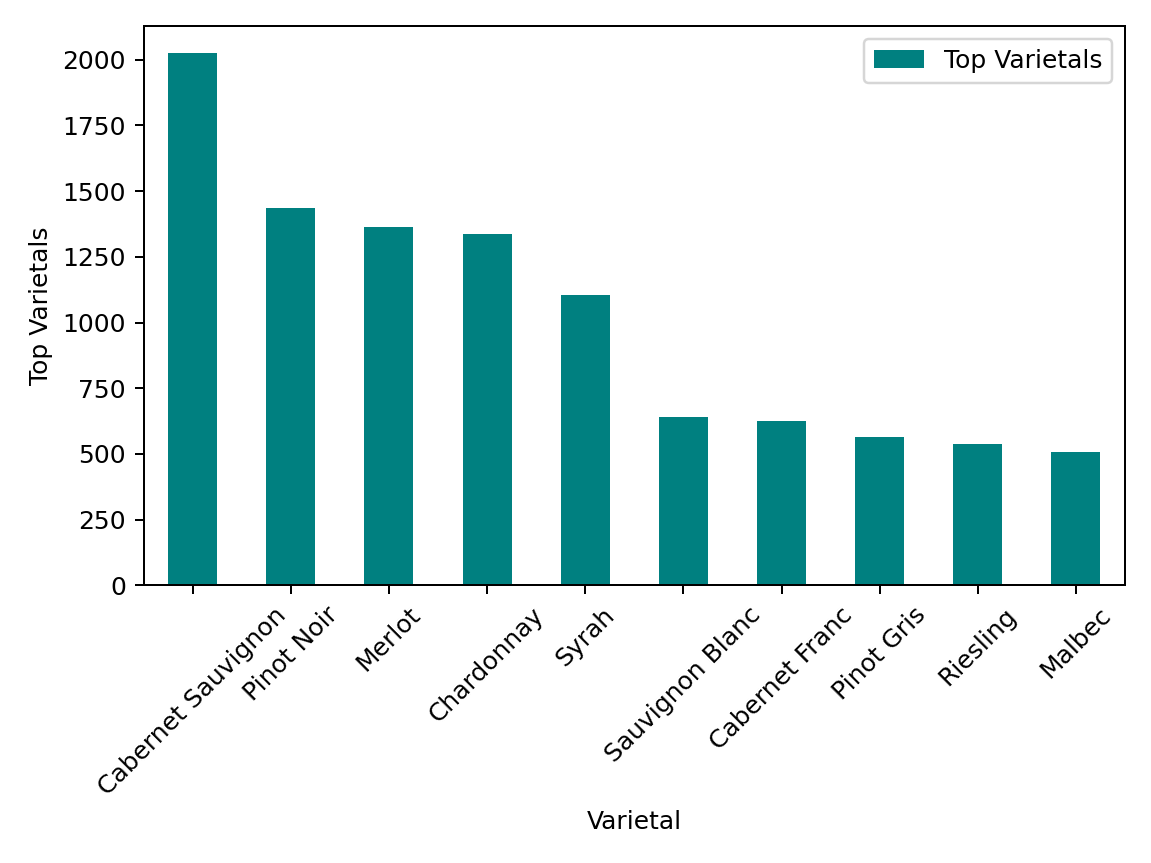

In [47]:
# Plot for Top Ten Varietal Types in the Top Ten Wine Producing Countries
top10_var_plot = top10_varietals_split_df.plot.bar(rot=45, facecolor="teal", align="center")
plt.xlabel('Varietal', fontsize=10)
plt.ylabel('Top Varietals', fontsize=10)
plt.tight_layout()
plt.savefig("top10_var_plot")